# **Mengakses API covid19.go.id**
Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

## **Status Code**
Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

200 Artinya permintaan sukses dipenuhi.

404 Artinya berkas yang diminta tidak dapat ditemukan.

500 Artinya akses permintaan ditolak.

501 Artinya terjadi kesalahan pada server.

In [2]:
print(resp)

<Response [200]>


In [3]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Thu, 01 Jul 2021 15:08:07 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 01 Jul 2021 15:05:55 GMT', 'ETag': 'W/"60ddd9d3-2de5c"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [4]:
cov_id_raw  = resp.json()

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [5]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-07-01
Jumlah penambahan kasus sembuh : 9874
Jumlah penambahan kasus meninggal : 504
Jumlah total kasus positif hingga saat ini : 2203108
Jumlah total kasus meninggal hingga saat ini: 58995


# **Memahami Kasus COVID-19 di DKI Jakarta**

In [7]:
import requests
resp_DKI = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json')
cov_DKI_raw = resp_DKI.json()

In [9]:
print('Nama-nama elemen utama:\n', cov_DKI_raw.keys())
print('\nJumlah total kasus COVID-19 di DKI Jakarta : %d' %cov_DKI_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di DKI Jakarta : %f.2%%' %cov_DKI_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : %f.2%%' %cov_DKI_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di DKI Jakarta : 482264
Persentase kematian akibat COVID-19 di DKI Jakarta : 1.642669.2%
Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : 91.613929.2%


In [10]:
import numpy as np
import pandas as pd
cov_DKI = pd.DataFrame(cov_DKI_raw['list_perkembangan'])
print('Info cov_DKI Jakarta:\n', cov_DKI.info())
print('\nLima data teratas cov_DKI Jakarta:\n', cov_DKI.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       479 non-null    int64
 1   KASUS                         479 non-null    int64
 2   MENINGGAL                     479 non-null    int64
 3   SEMBUH                        479 non-null    int64
 4   DIRAWAT_OR_ISOLASI            479 non-null    int64
 5   AKUMULASI_KASUS               479 non-null    int64
 6   AKUMULASI_SEMBUH              479 non-null    int64
 7   AKUMULASI_MENINGGAL           479 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  479 non-null    int64
dtypes: int64(9)
memory usage: 33.8 KB
Info cov_DKI Jakarta:
 None

Lima data teratas cov_DKI Jakarta:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583020800000      2  ...                    0                             2
1  15

In [12]:
cov_DKI_tidy = (cov_DKI.drop(columns=[item for item in cov_DKI.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
cov_DKI_tidy['tanggal'] = pd.to_datetime(cov_DKI_tidy['tanggal']*1e6, unit='ns')
print('Lima data terakhir:\n', cov_DKI_tidy.tail())


Lima data teratas:
        tanggal  kasus_baru  meninggal  sembuh
474 2021-06-18        4737         66    2110
475 2021-06-19        4895         60    2443
476 2021-06-20        5582         69    2457
477 2021-06-21        5014         74    2835
478 2021-06-22        3221         59    3481


<Figure size 432x288 with 0 Axes>

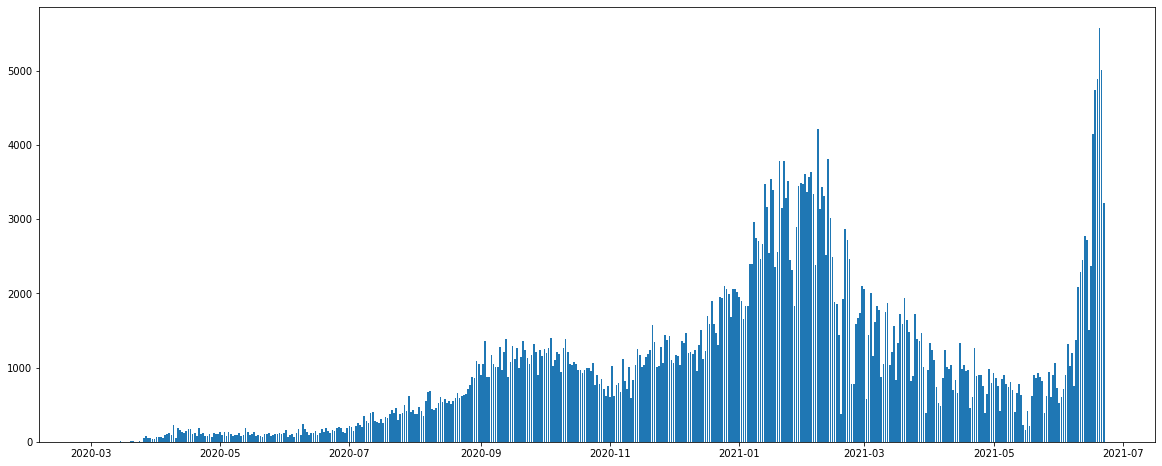

In [42]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_DKI_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

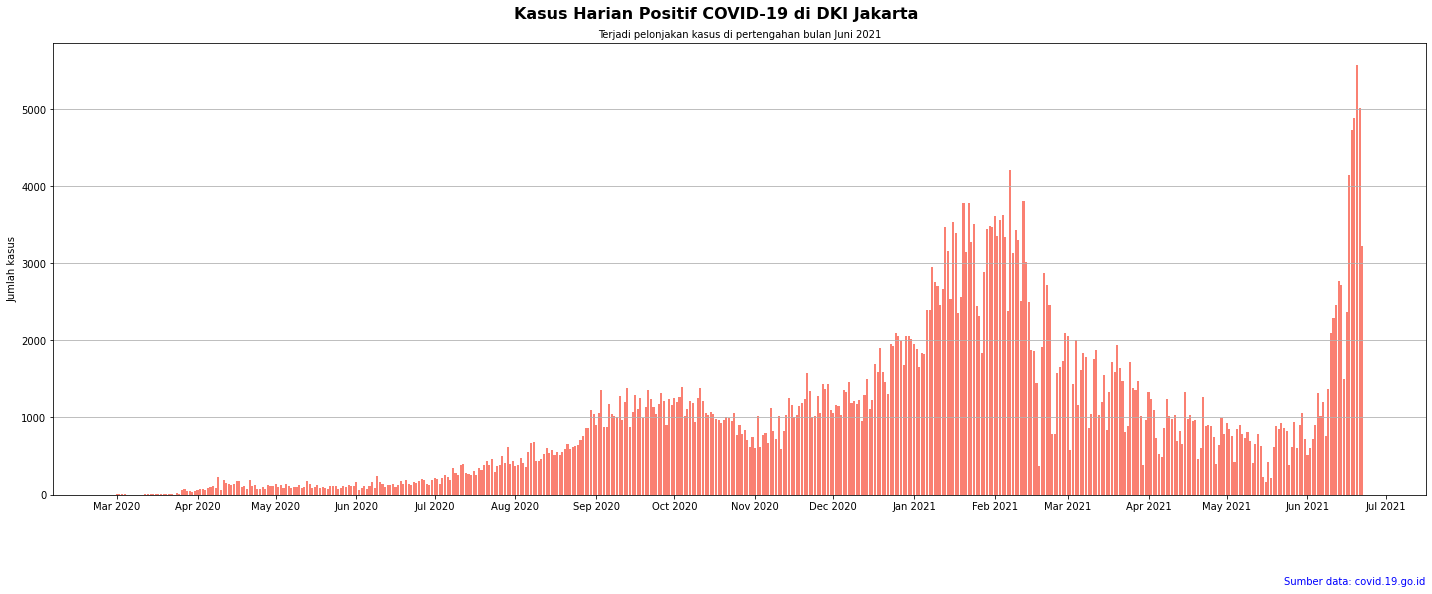

In [23]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_DKI_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di DKI Jakarta',
y=1.02, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di pertengahan bulan Juni 2021',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

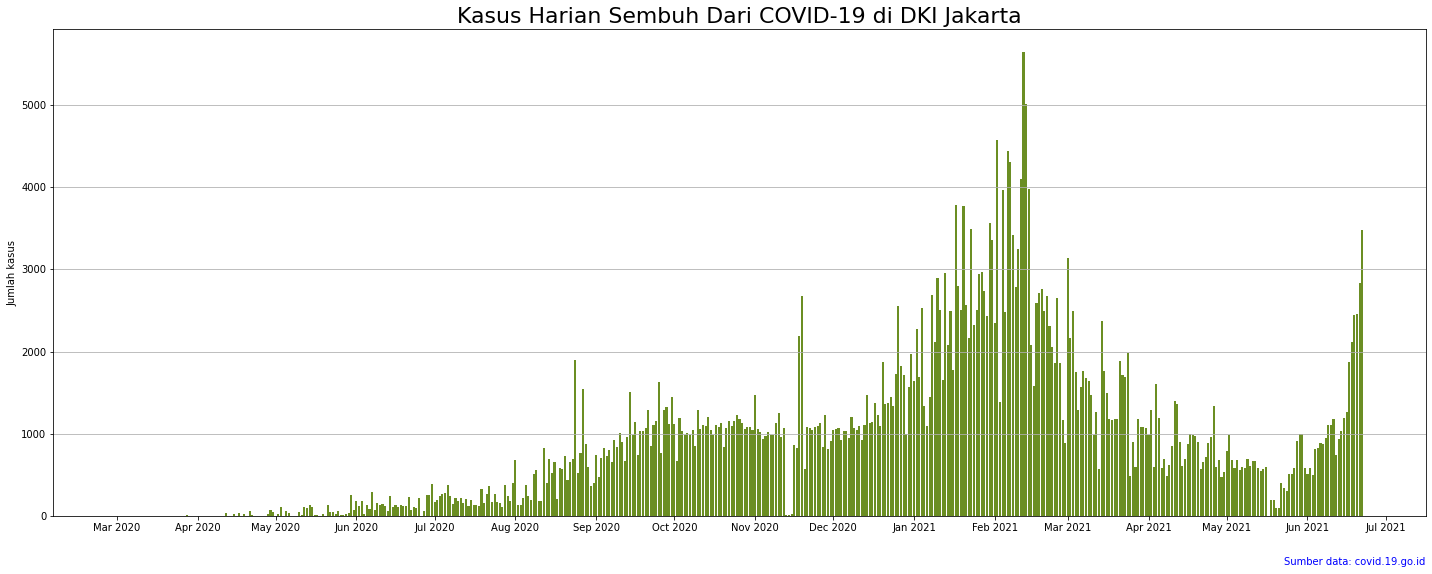

In [28]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_DKI_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

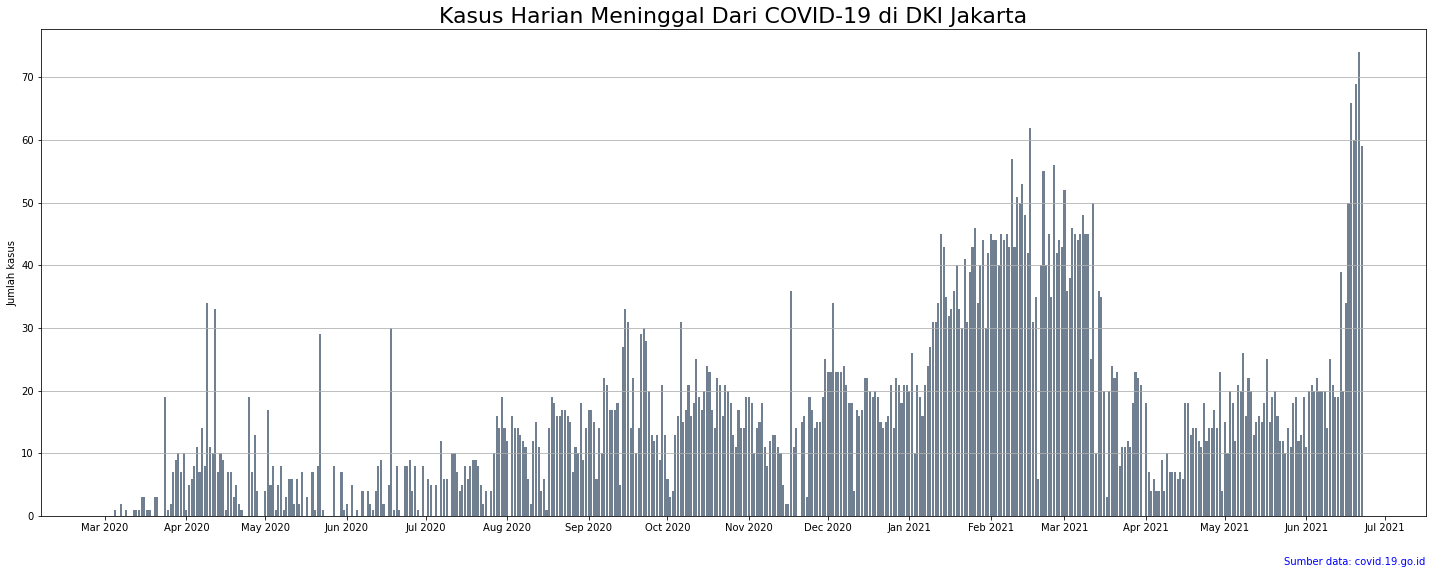

In [30]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_DKI_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
cov_DKI_pekanan = (cov_DKI_tidy.set_index('tanggal')['kasus_baru']
					  .resample('W')
					  .sum()
					  .reset_index()
					  .rename(columns={'kasus_baru': 'jumlah'})
)
cov_DKI_pekanan['tahun'] = cov_DKI_pekanan['tanggal'].apply(lambda x: x.year)
cov_DKI_pekanan['pekan_ke'] = cov_DKI_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_DKI_pekanan = cov_DKI_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_DKI Jakarta_pekanan:')
print(cov_DKI_pekanan.info())
print('\nLima data teratas cov_DKI Jakarta_pekanan:\n', cov_DKI_pekanan.head())

Info cov_DKI Jakarta_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     70 non-null     int64
 1   pekan_ke  70 non-null     int64
 2   jumlah    70 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB
None

Lima data teratas cov_DKI Jakarta_pekanan:
    tahun  pekan_ke  jumlah
0   2020         9       2
1   2020        10       6
2   2020        11      16
3   2020        12      22
4   2020        13     248


In [33]:
cov_DKI_pekanan['jumlah_pekanlalu'] = cov_DKI_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_DKI_pekanan['lebih_baik'] = cov_DKI_pekanan['jumlah'] < cov_DKI_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_DKI_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         9       2                 0       False
1   2020        10       6                 2       False
2   2020        11      16                 6       False
3   2020        12      22                16       False
4   2020        13     248                22       False
5   2020        14     421               248       False
6   2020        15     933               421       False
7   2020        16     958               933       False
8   2020        17     749               958        True
9   2020        18     762               749       False


<Figure size 432x288 with 0 Axes>

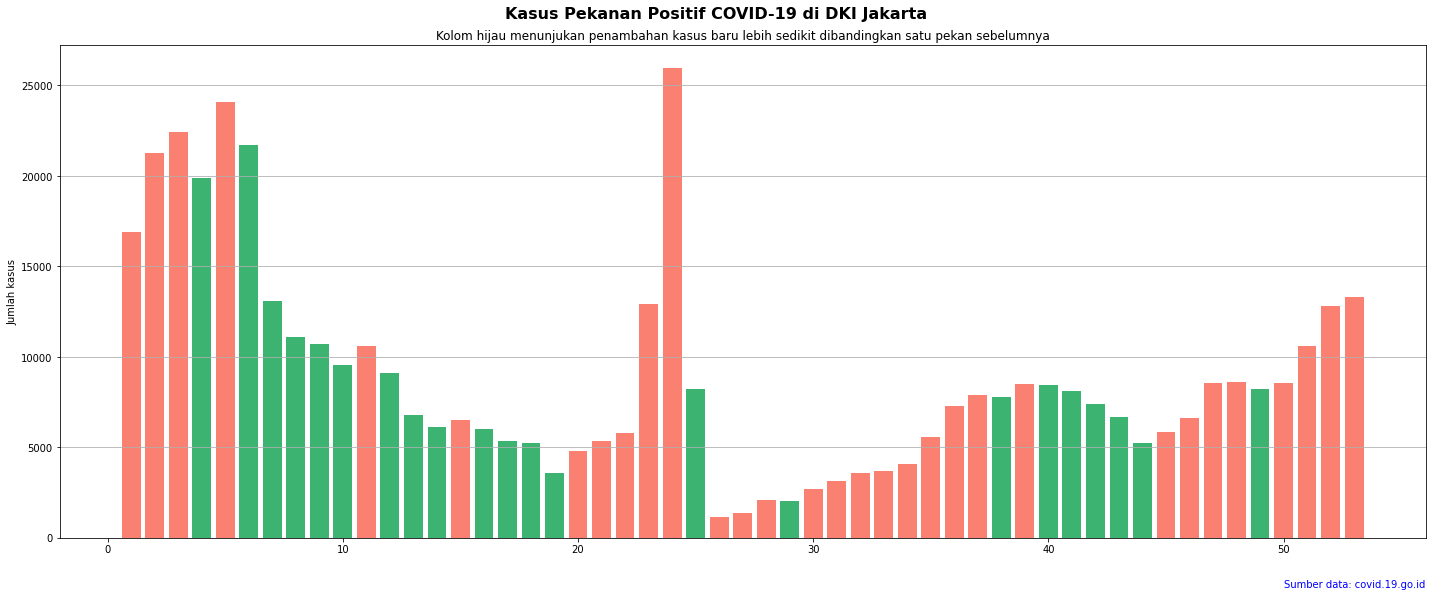

In [36]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_DKI_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_DKI_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di DKI Jakarta',
y=1.02, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [37]:
cov_DKI_akumulasi = cov_DKI_tidy[['tanggal']].copy()
cov_DKI_akumulasi['akumulasi_aktif'] = (cov_DKI_tidy['kasus_baru'] - cov_DKI_tidy['sembuh'] - cov_DKI_tidy['meninggal']).cumsum()
cov_DKI_akumulasi['akumulasi_sembuh'] = cov_DKI_tidy['sembuh'].cumsum()
cov_DKI_akumulasi['akumulasi_meninggal'] = cov_DKI_tidy['meninggal'].cumsum()
cov_DKI_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
474,2021-06-18,25330,430566,7619
475,2021-06-19,27722,433009,7679
476,2021-06-20,30778,435466,7748
477,2021-06-21,32883,438301,7822
478,2021-06-22,32564,441782,7881


<Figure size 432x288 with 0 Axes>

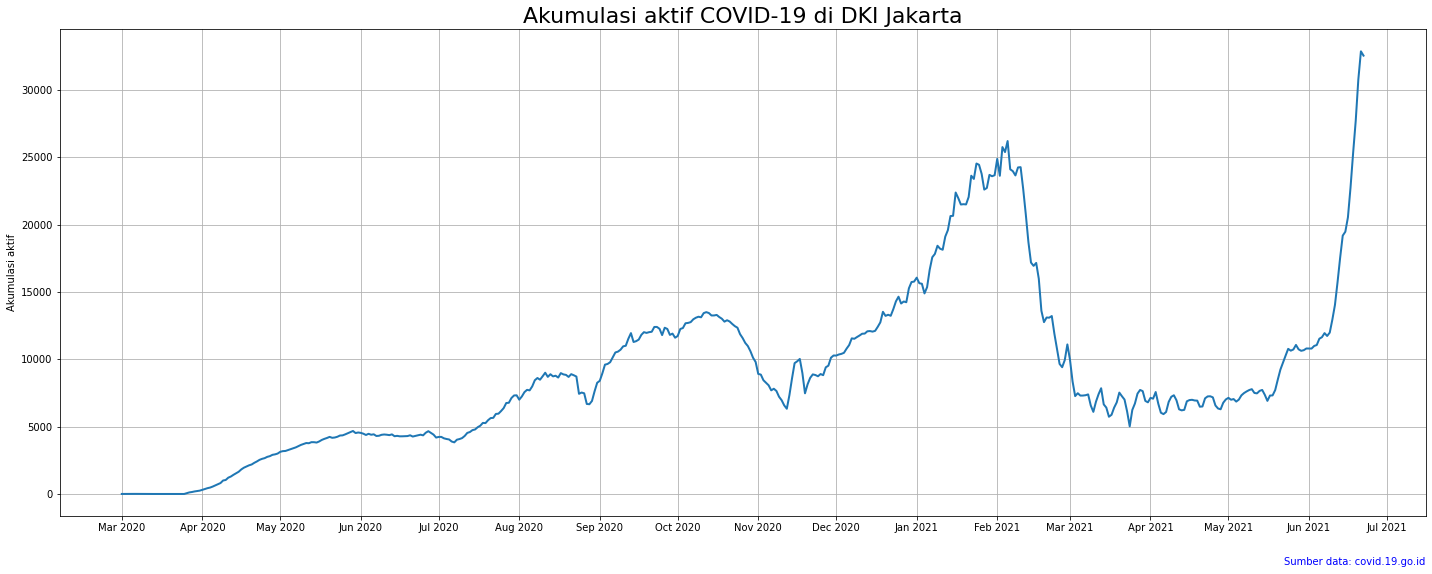

In [39]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_DKI_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

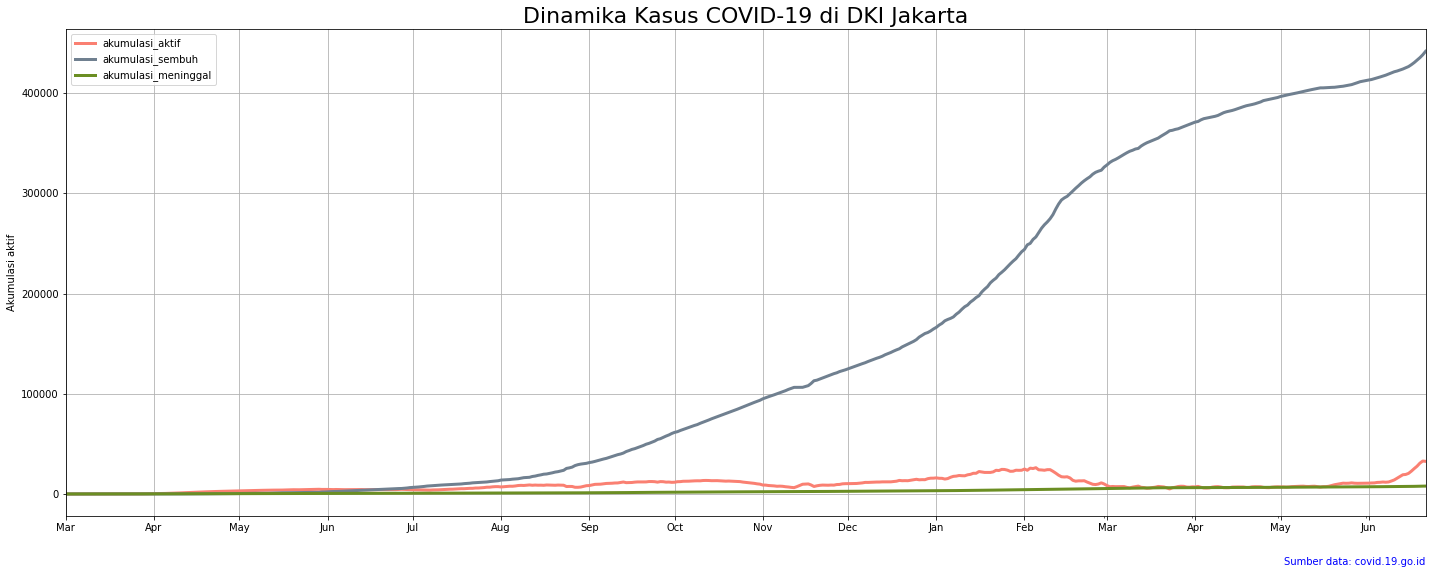

In [41]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
cov_DKI_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di DKI Jakarta',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()